# Part I - (Loan Data From Prosper)
## by (Keren N. Wang'ombe)

## Introduction
> This dataset contains information about loans from Prosper.  Prosper is a peer-to-peer lending platform. Borrowers can find competitive rates for personal loans. Loans are funded by investors, not Prosper itself. The dataset contains 81 parameters that need cleaning before visualisation.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
loan_data.shape

(113937, 81)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan_data.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Create new dataset from the data provided of the columns that will be used in visualization. 

In [7]:
loan = pd.read_csv('prosperLoanData.csv', usecols=['ListingNumber', 'ListingKey','Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR','ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
            'EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanMonthsSinceOrigination','LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'])

In [8]:
loan

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,NaN,NaN,0,Self-employed,True,"$25,000-49,999",78,9425,2007-09-12 00:00:00,330.43
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,A,7.0,2,Employed,False,"$50,000-74,999",0,10000,2014-03-03 00:00:00,318.93
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,NaN,NaN,0,Not available,False,Not displayed,86,3001,2007-01-17 00:00:00,123.32
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,A,9.0,16,Employed,True,"$25,000-49,999",16,10000,2012-11-01 00:00:00,321.45
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,D,4.0,2,Employed,True,"$100,000+",6,15000,2013-09-20 00:00:00,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,36,Current,0.22354,0.1864,C,5.0,1,Employed,True,"$50,000-74,999",11,10000,2013-04-22 00:00:00,364.74
113933,E6DB353036033497292EE43,537216,36,FinalPaymentInProgress,0.13220,0.1110,A,8.0,7,Employed,True,"$75,000-99,999",28,2000,2011-11-07 00:00:00,65.57
113934,E6E13596170052029692BB1,1069178,60,Current,0.23984,0.2150,D,3.0,1,Employed,True,"$25,000-49,999",3,10000,2013-12-23 00:00:00,273.35
113935,E6EB3531504622671970D9E,539056,60,Completed,0.28408,0.2605,C,5.0,2,Full-time,True,"$25,000-49,999",28,15000,2011-11-21 00:00:00,449.55


In [9]:
loan.shape

(113937, 16)

### What is the structure of your dataset?

> Originally there were 113,937 entries in the dataset with 81 columns.Not all columns will be needed in the analysis and others may need to be dropped. Most variables are numeric in nature. After picking the columns that I needed there are 16 columns. 

### What is/are the main feature(s) of interest in your dataset?

- Borrower APR
- Borrower Rate
- Prosper Rating (Alpha)
    
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- EmploymentStatus
- LoanOriginalAmount
- IncomeRange
- IsBorrowerHomeowner

## Univariate Exploration

In [10]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,113937.000000,113937.00000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,2.774209,31.896882,8337.01385,272.475783
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,3.996797,29.974184,6245.80058,192.697812
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,1000.00000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,1.000000,6.000000,4000.00000,131.620000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,1.000000,21.000000,6500.00000,217.740000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,3.000000,65.000000,12000.00000,371.580000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,20.000000,100.000000,35000.00000,2251.510000


In [11]:
# start by creating a fuction for ploting a histogram for univariate plots.
def hist_plot(df,x_value,bin):
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    plt.hist(data = loan, x = x_value, bins = bin);
    # srtting the title for the data set
    plt.title('BorrowerAPR Distribution',fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count',fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel('BorrowerAPR',fontsize=10,weight=("bold"))

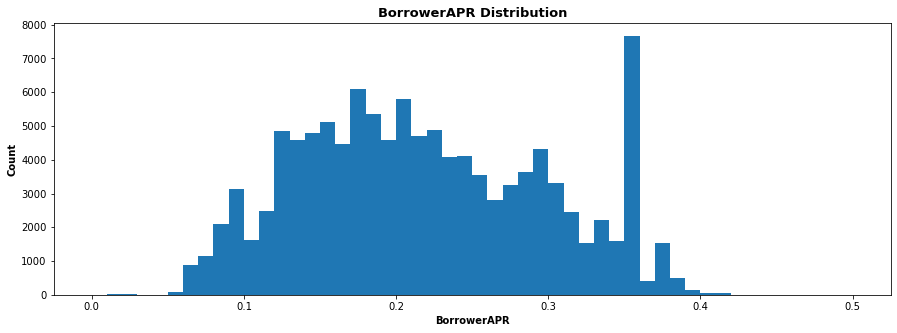

In [12]:
# plot the borrower rate with the function cretaed previously
hist_plot(loan,'BorrowerAPR',bin = np.arange(0, 0.5+0.01, 0.01))

The graph demonstrates that the _BorrowerAPR_ plot is multimodal. With the first peak at 0.1, there is a progressive climb to 2.0 between the second and third peaks, followed by a decline to the fourth peak at 0.3. A surge occurred at 0.4 with a peak count of approximately 8,000. The range of the borrower's APR% rate is between 0.1 and 0.4.

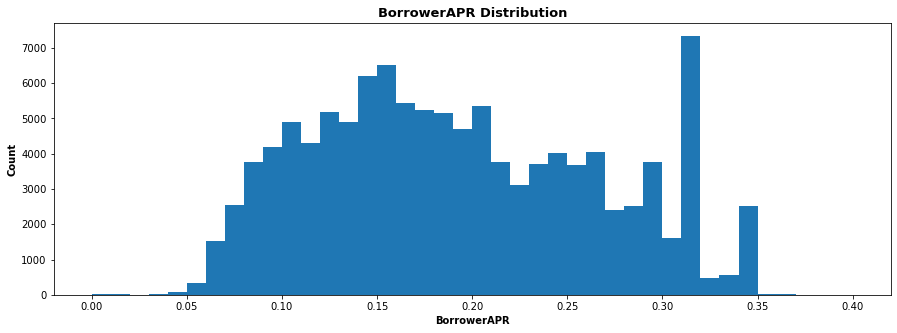

In [13]:
# using the previously created function I will plot borrower rate distribution 
hist_plot(loan,'BorrowerRate',bin = np.arange(0, 0.4+0.01, 0.01))

The BorrowerRate distribution is nearly identical to that of the Borrower APR, with its maximum peak just above 0.3 and a count of approximately 7000. This was predicted, given the BorrowerRate and other due rates, when aggregated, comprise the Borrower APR.

In [14]:
#describe the loanoriginalamount column
np.log10(loan['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

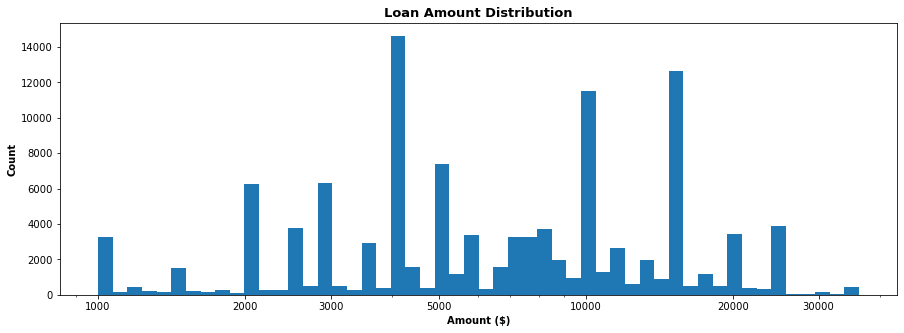

In [15]:
#setting the bins
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+0.03, 0.03)
# setting fig size
plt.figure(figsize = [15, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
ticks = [1000,2000,3000,5000,10000,20000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Amount ($)', fontsize=10,weight=("bold"))
plt.ylabel('Count', fontsize=10,weight=("bold"))
plt.title('Loan Amount Distribution', fontsize=13,weight=("bold"))
plt.xticks(ticks, labels);

The loan amount distribution is multimodal, beginning at 1000 and peaking at approximately 5000. This indicates that the amount collected by borrowers is broadly dispersed between 1,000 and slightly more than 30,000.

In [16]:
# this function will be used for plotting count plots with the x variable
def count_xplot(df,x_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 variables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, x = x_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

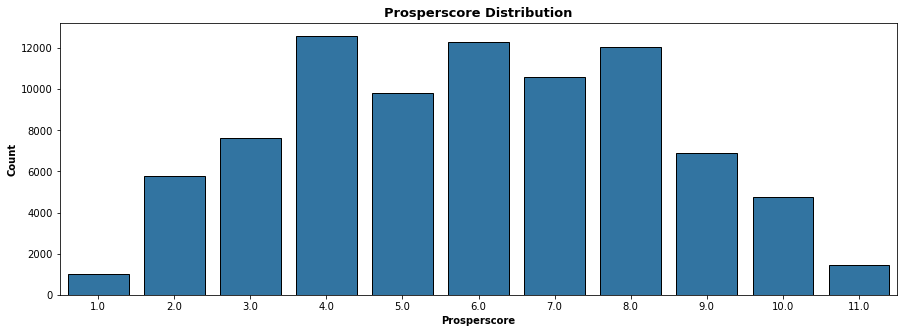

In [17]:
# using the function count xplot 
count_xplot(loan,'ProsperScore')

The plot showed that the ProsperScore distribution is multimodal, with score 4 having the highest count of about 1200,followed by 6 and 8 and the lowest count score is 1 showing that more individuals where giving a good prosper score rating.

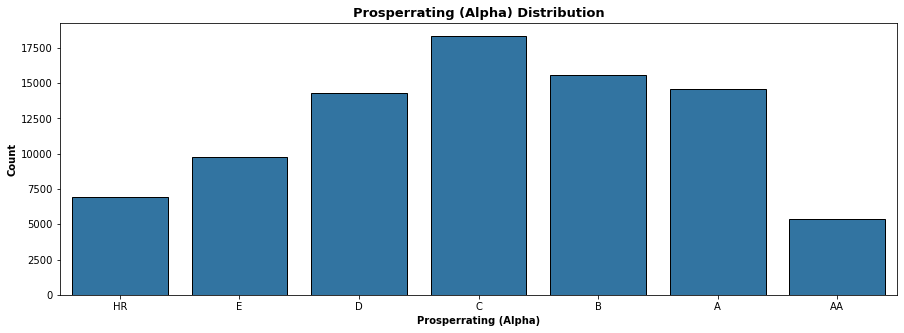

In [18]:
# the ProsperScore rating needs to be set in order since it is an ordinal type of data
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(rate_set);
# ploting a distribution count plot for it
count_xplot(loan,'ProsperRating (Alpha)')

The prosper rating has a steady increase from HR with slightly below 7500 towards C, which is the peak of the distribution with about 17500 counts. B and A between 15000 and 12500 count while decreasing towards AA.the proser distribution shows that individuals with the highest rating are the least in the population.

In [19]:
# creating a fuction for ploting my count plot with x variable.
def count_yplot(df,y_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = loan, y = y_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title('EmploymentStaus Distribution',fontsize=13,weight=("bold"))
    # setting the y label
    plt.xlabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.ylabel(y_value.title(),fontsize=10,weight=("bold"))

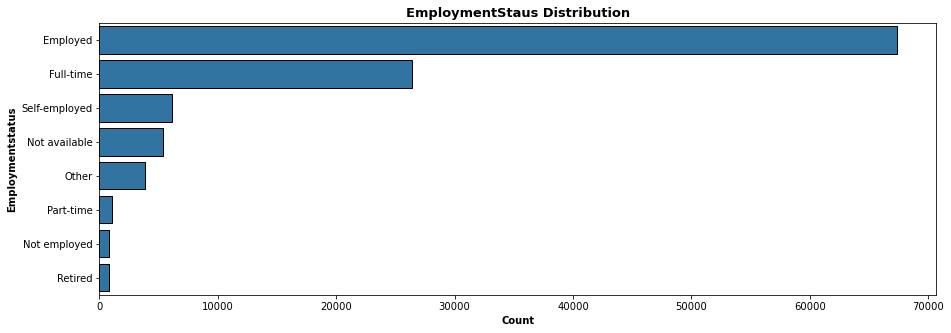

In [20]:
# creating an order for the plot 
orders=loan.EmploymentStatus.value_counts().index
# using the y function to plot the distribution
count_yplot(loan,'EmploymentStatus',order=orders)

The employment status distribution shows that the majority of individuals who applied for the loan are employed with a count of about 70000, while the least individuals are retired.

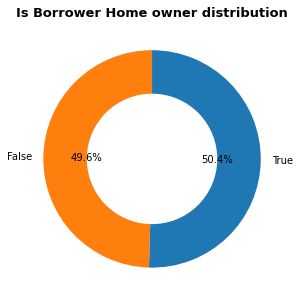

In [21]:
# creating a doughnut plot for the homeowner distribution
counts=loan.IsBorrowerHomeowner.value_counts()
 # setting the fig size for ploting
plt.figure(figsize = [15, 5])
plt.pie(counts, labels = counts.index,autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Is Borrower Home owner distribution", fontsize=13,weight=("bold"));

The Borrower Homeowner dougnut plot shows an almost even distribution between borrowers who have a home and those who do not. The plot therefore implies that home ownership might not have a significant effect on getting a loan.

In [22]:
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

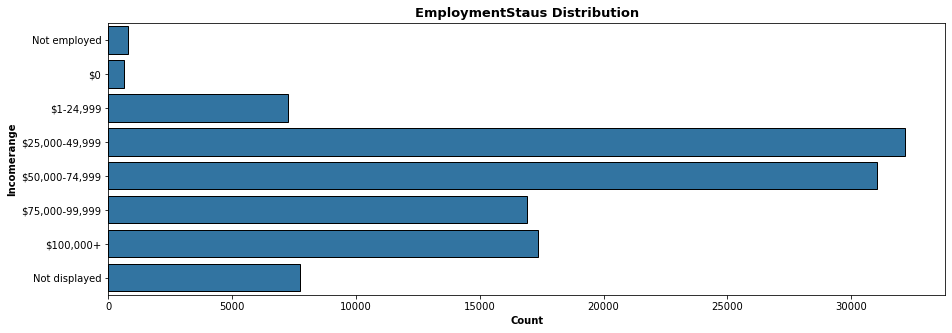

In [23]:
# I will create an order for the plot IncomeRange 
income_orders=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
# using the function count_yplot for ploting
count_yplot(loan,'IncomeRange',order=income_orders)

The plot shows that the large number of borrowers are of the income range 25,000 - 74,999 range

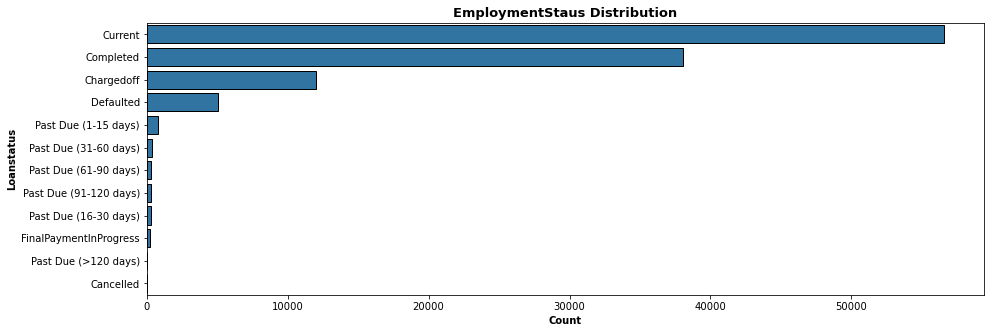

In [24]:
# creating an order to plot the loan status
orders=loan.LoanStatus.value_counts().index
# using count plot for the Loan status distribution
count_yplot(loan,'LoanStatus',order=orders)

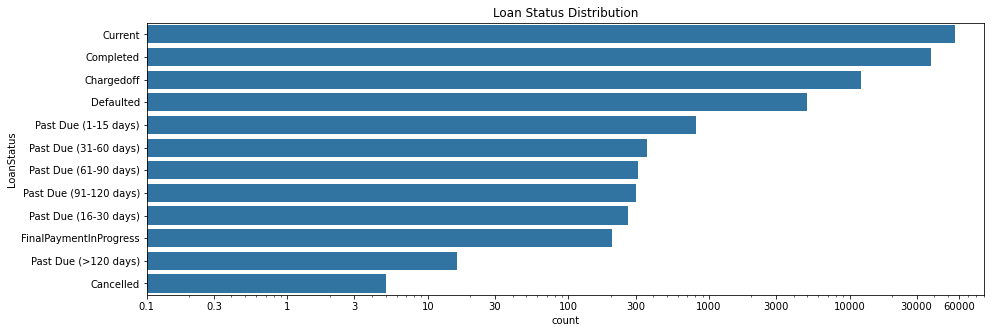

In [25]:
# ploting the fig size using a log scale to make the plot more distributed
plt.figure(figsize=[15,5])
colour= sb.color_palette()[0]
# creating an order for the plot LoanStatus 
orders=loan.LoanStatus.value_counts().index
# creating tick marks
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000,60000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
# using count plot for the IncomeRange status distribution
sb.countplot(data= loan,y= 'LoanStatus',color=colour,order=orders);
plt.title("Loan Status Distribution");
# using a log scale to show 
plt.xscale('log');
plt.xticks(ticks, labels);

The plot shows that the borrowers who are currently on the loan plan are the highest followed by those who have completed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> BorrowerAPR is multimodal, with an out-of-the-ordinary spike at roughly 0.4%; I needed to log-transform the data to make sense of the plot. Furthermore, the Borrowerintrest followed a similar pattern to the BorrowerAPR, which is to be expected given that the BorrowerAPR is calculated by adding the interest rate to any additional fees and expenses, such as the mortgage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the distributions were regular, but I had to use a log function in the scaling to prevent extremes, and I used loops to switch the listing category from numbers to it variables so that the data set would be more accurately represented.

## Bivariate Exploration

## Average borrower APR rate per year.
The purpose is to look at which year borrowers borroed the most.

In [26]:
loan.LoanOriginationDate.dtypes

dtype('O')

In [27]:
#change the column to datetime to create a plot
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])
loan.dtypes

ListingKey                            object
ListingNumber                          int64
Term                                   int64
LoanStatus                            object
BorrowerAPR                          float64
BorrowerRate                         float64
ProsperRating (Alpha)               category
ProsperScore                         float64
ListingCategory (numeric)              int64
EmploymentStatus                      object
IsBorrowerHomeowner                     bool
IncomeRange                           object
LoanMonthsSinceOrigination             int64
LoanOriginalAmount                     int64
LoanOriginationDate           datetime64[ns]
MonthlyLoanPayment                   float64
dtype: object

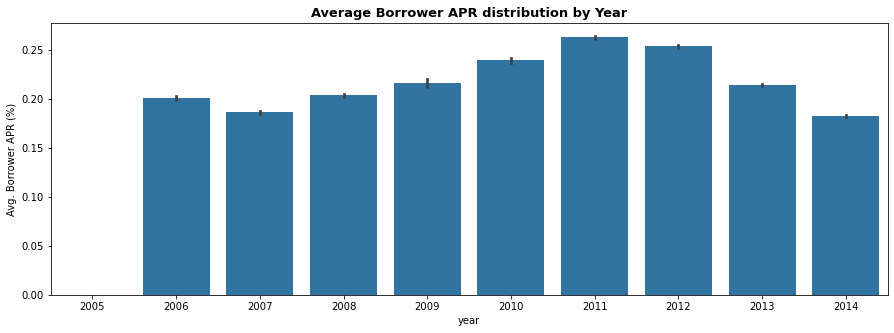

In [28]:
# creating a column for the years  form the loan original date column
loan['year']= loan['LoanOriginationDate'].dt.year
plt.figure(figsize = [15, 5])
# creating a bar plot to show the average borrower Apr distribution by year.
sb.barplot(data=loan,x='year',y='BorrowerAPR',color=colour);
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Year', fontsize=13,weight=("bold"));

The plot shows that 2006 had 0.2% with a slight fall to 2007 and a gradual increase till 2011 which was the highest APR % rate about 0.25%. A steady fall occurred from 2012 to 2014.

## Borrower Rate vs. Employment status
and 
## Borrower Rate vs. Income Range

This will look at the at the relationship between the borrower's rate and employment status togethor with borrower's rate and income range. Is the rate determined rate based on employment status

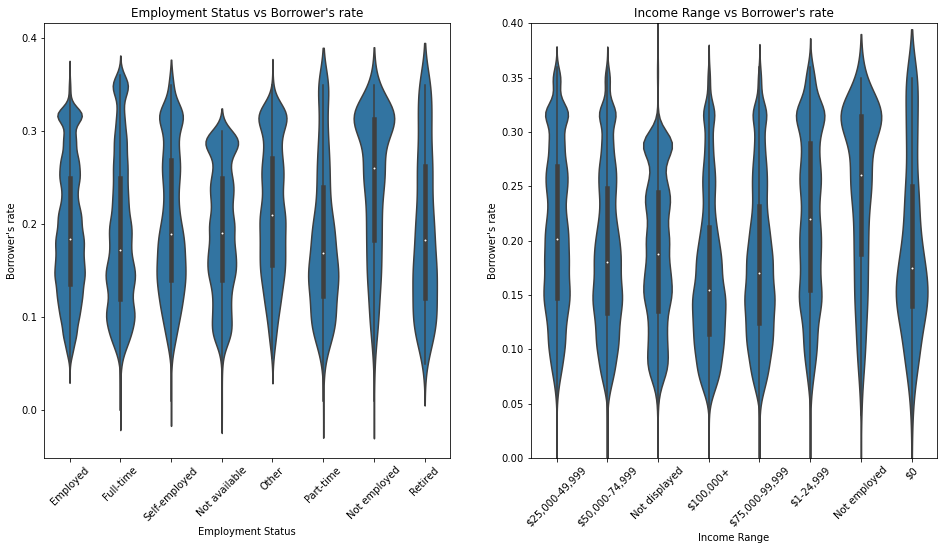

In [29]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[16, 8]);
colorChoice = sb.color_palette()[0]
orders=loan.EmploymentStatus.value_counts().index

plt.subplot(1,2,1)
sb.violinplot(data = loan, x = 'EmploymentStatus', y = 'BorrowerRate', color=colorChoice, order=orders);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.violinplot(data = loan, x = 'IncomeRange', y = 'BorrowerRate', color=colorChoice);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

Employed individuals do not generally have a lower rate. However, the unemployment rate has a larger median rate and a greater frequency concentration above the median. Observing the income range plot, there is a minor tendency for the median rate to decrease as the income range increases. It appears that income range plays a role in determining the rate a borrower would receive.

##  BorrowerAPR  vs ProsperRating(Alpha) 
and
##  BorrowerAPR vs Prosper Score 

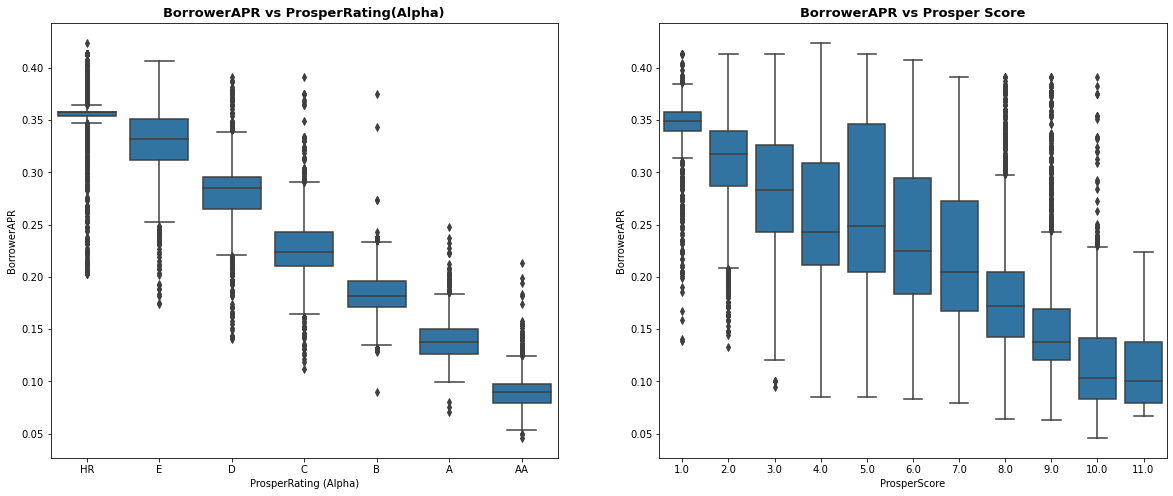

In [30]:
# ploting fig size
plt.figure(figsize=[20,8])
# stating the position of the plot
plt.subplot(1,2,1)
plt.title('BorrowerAPR vs ProsperRating(Alpha)', fontsize=13,weight=("bold"))
# setting a box plot to show the distribution 
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=colour);
# stating the position of the second plot
plt.subplot(1,2,2)
plt.title('BorrowerAPR vs Prosper Score', fontsize=13,weight=("bold"))
#setting a box plot for the Scores distribution
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', color=colour);

From the plot, we can deduce that the higher the ratings, the lower the borrower APR which can be interprated to mean to have a good rating, ones APR must be below 0.1%

## Loan Amount vs Borrowers APR

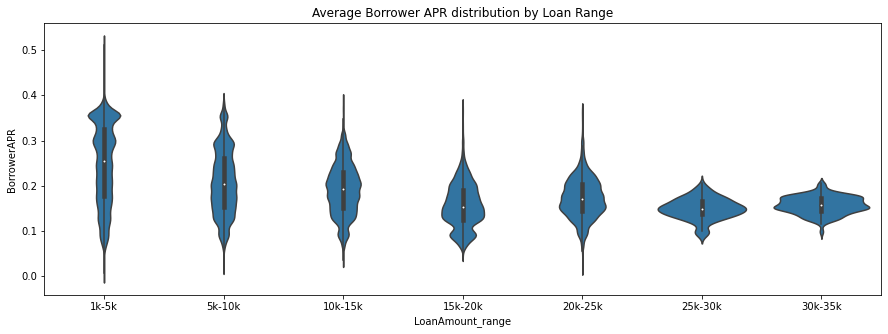

In [34]:
# used the .cut function to create a new column for loan amount range
loan['LoanAmount_range']=pd.cut(loan.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
# plotting the violinplot
sb.violinplot(data=loan, x='LoanAmount_range', y='BorrowerAPR', color=colour);
plt.title('Average Borrower APR distribution by Loan Range');

The plot shows that the borrower rate fluctuates as the loan amount gets higher.

## Income Range vs IsBorrowerHomeowner

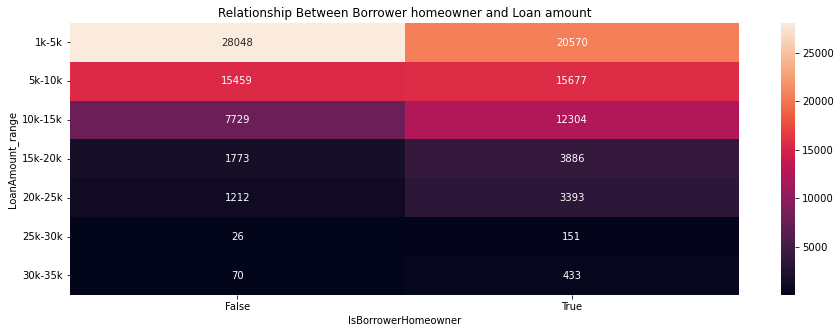

In [35]:
#used the group by statement to group the varaibles
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).size()
# used the .index to set it into a data frame
group=group.reset_index(name='count')
# pivoted the data set
plt.figure(figsize = [15, 5])
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'count')
# plotted a heat map for the distribution
sb.heatmap(group,annot = True, fmt = 'd');
plt.title('Relationship Between Borrower homeowner and Loan amount');

- The plot shows that most loan borrowers were indeed homeowners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The distribution shows that the APR mean values were within the 0.2 range, with 2011 being the month with the highest APR rate. Also, the month with lower API shows a high borrower count and vice versa.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employed individuals do not generally have a lower rate. However, the unemployment rate has a larger median rate and a greater frequency concentration above the median. Observing the income range plot, there is a minor tendency for the median rate to decrease as the income range increases. It appears that income range is a role in determining the rate a borrower would receive.
> Most borrowers were those who had homes. 


## Multivariate Exploration

### Year borrower's rate vs. ProsperScore vs. isHomeOwner
Does yearly prosperScore and homeowner affect borrower's rate?

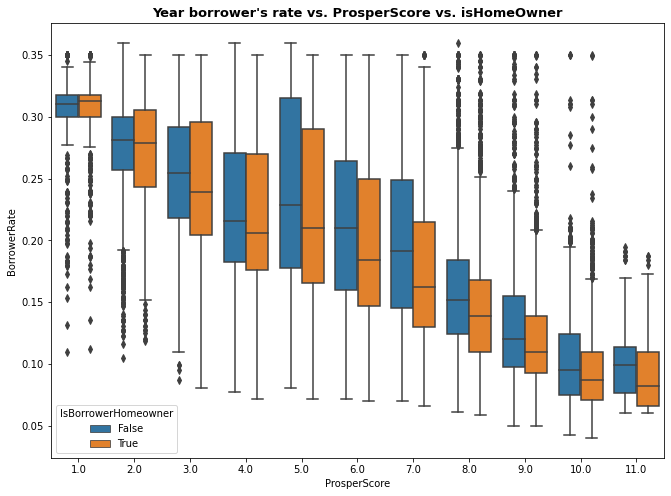

In [62]:
#create a boxplot with the three variables
plt.figure(figsize=[11, 8]);
sb.boxplot(data = loan, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('Year borrower\'s rate vs. ProsperScore vs. isHomeOwner', fontsize =13, weight=("bold"));

In the plot, for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

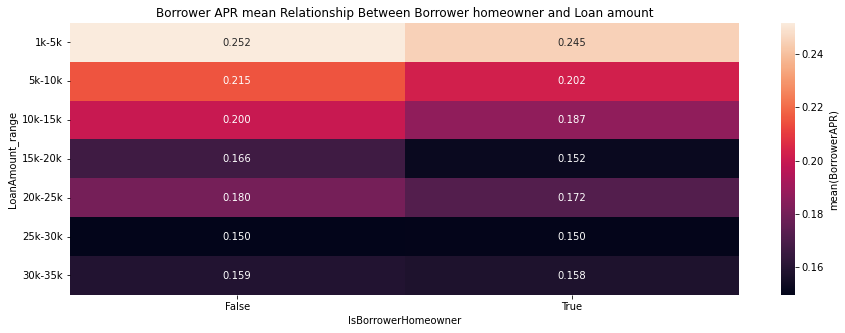

In [57]:
# adding the borrower APR to the chat
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount');

## Year borrower's rate vs. ProsperScore vs. IncomeRange
Does Income range and prosperscore affect borrower's rate?

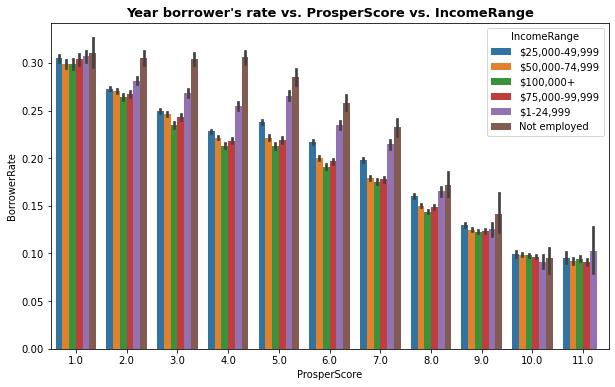

In [46]:
#create a plot showing the relation
plt.figure(figsize=[10, 6]);
income_range_valid = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','$1-24,999', 'Not employed']
income_range_sub = loan.loc[loan['IncomeRange'].isin(income_range_valid)]
#plot
sb.barplot(data = income_range_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. IncomeRange', fontsize=13, weight = ('bold'));

The plot clearly shows that  the higher the income, the lower the rate will be and for the unemployed, the rate will be signficantly higher than those who are employed.

## Yearly Borrower rate vs. isHomeOwner

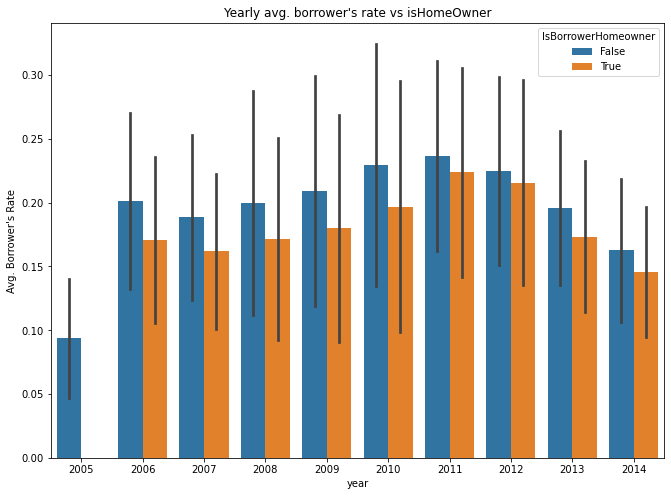

In [54]:
plt.figure(figsize=[11, 8]);
sb.barplot(data = loan, x = 'year', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Avg. Borrower\'s Rate');
plt.title('Yearly avg. borrower\'s rate vs isHomeOwner');

According to the plot, it shows that homeowners have a slightly lower rate that non-homeowners.

## Does the term have a significance effect on the loan and APR

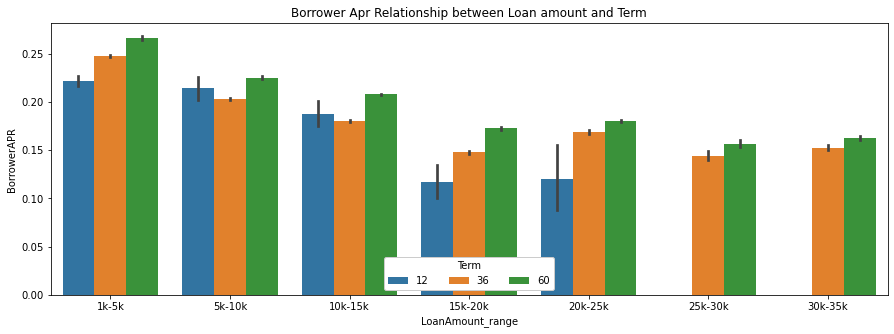

In [55]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5])
yx=sb.barplot(data=loan,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term");

The plot shows that the longer terms (5 years) had higher borrower APR's 
which means the longer the term the individual collect the loan the higher their APR gets.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is clear that homeowners with a prosperscore of 5 and above get a lower Borrower rate than those who are not homeowners. The plot showed that the higher the APR, the lower the loan collected and the homeowner had no influence on the loan amount range. 

### Were there any interesting or surprising interactions between features?

> The loan term plays a significant role on how higher the borrower's APR gets. Also, the lower the borrower APR, the higher the ratings.

## Conclusions
>From the plots, it is clear that the  borrower APR had the same trend as the borrowers rate. From the exploration of the loan, the data set reveals that the higher the ratings, the lower the borrower's APR, and collecting loans for a longer period will increase their borrower's APR. Most loans were collected for 3 years and the borrowers APR mean lies within 0.2%. In addition, the homeowner distribution was almost even, and of the population who collected the highest loans, the homeowners dominated the range. Overall the borrower's APR will be crucial to consider when given out loan.